# Income Classification Using LightGBM and Scikit-learn


### Task 1: Import Libraries

Import the following libraries to complete this task:

numpy: This is for numerical processing and working with arrays.

pandas: This is for data manipulation and analysis.

lightgbm: This is for the gradient boosting library for modeling.

sklearn.model_selection: This is for splitting data, cross-validation, and hyperparameter tuning. From this module, only import the following functions:

train_test_split(): This is to split the dataset into train and test sets.

cross_val_score(): This is to score the cross-validation training.

RandomizedSearchCV(): This is to optimize the hyperparameters using randomized search.

sklearn.preprocessing: This is for encoding categorical variables. From this module, only import the following function:

OneHotEncoder(): This is to encode categorical variables.

sklearn.metrics: This is for model evaluation metrics. From this module, only import the following functions:

classification_report(): This is to evaluate the model performance.

confusion_matrix(): This is to plot the confusion matrix used to assess false positives and false negatives.

roc_auc_score(): This is to calculate the AUC-ROC metric.

matplotlib: This is for visualizations and plotting.

seaborn: This is for providing ready-to-use plots for exploratory data analysis.

scipy.stats. This is for probability distributions for hyperparameter tuning. From this module, only import the following functions:

uniform(): This is a uniform probability distribution.

randint(): This returns a random integer in a given range.

shap: This is for model interpretations and feature importance.

In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform as sp_uniform   
from scipy.stats import randint as sp_randint
import shap

### Task 2: Load the Adult Census Dataset 

Data Description : 

Age: The age of the individual, measured in years

Workclass: The type of employer the individual works for

fnlwgt: Final weight, a numerical value used to represent the number of people the census believes the entry represents

Education: The highest level of education achieved by the individual

Education-Num: A numerical representation of the highest level of education achieved

Marital status: Marital status of the individual

Occupation: The type of occupation/job of the individual

Relationship: The familial relationship of the individual to others in the household

Sex: The biological sex of the individual

Capital Gain: Monetary profits of the individual in the past 12 months

Capital Loss: Monetary losses of the individual in the past 12 months

Hours per week: Number of hours the individual works per week

Country: Country of origin of the individual

Income (target): Annual income level of the individual (<=50K, >50K)

In [2]:
# Load the data
df = pd.read_csv('/usercode/data.csv')

# Display the first five rows
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [3]:
df.shape

(32561, 14)

In [4]:
df.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Marital Status', 'Occupation', 'Relationship', 'Sex', 'Capital Gain',
       'Capital Loss', 'Hours per week', 'Country', 'Income'],
      dtype='object')

In [8]:
round(100*(df.isnull().sum()/len(df.index)),2)

Age               0.00
Workclass         5.64
fnlwgt            0.00
Education         0.00
Education-Num     0.00
Marital Status    0.00
Occupation        5.66
Relationship      0.00
Sex               0.00
Capital Gain      0.00
Capital Loss      0.00
Hours per week    0.00
Country           1.79
Income            0.00
dtype: float64

In [9]:
# Replace missing values with "Unknown"
df.fillna('Unknown', inplace=True)

In [10]:
df.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-Num     0
Marital Status    0
Occupation        0
Relationship      0
Sex               0
Capital Gain      0
Capital Loss      0
Hours per week    0
Country           0
Income            0
dtype: int64

In [11]:
# Summary statistics
df.describe()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Task 3: Perform Exploratory Data Analysis

1. Create a list of numerical features. These could include columns such as Age, Hours per week, etc.
2. 
Use a for loop to iterate through each numerical feature. Within the loop:

Create a figure and specify the size.

Plot a histogram of that feature using seaborn.

Add a title and axis labels.

Display the3.  figure.

Create a list of categorical features you want to visualize using bar charts. Some examples are Workclass, Educa4. tion, etc.

Use another for loop to iterate through each categorical feature. Within the loop:

Create a figure and specify the size.

Plot bars showing the counts for each category of that feature. Specify the dataset and order the bars from the highest to lowest count.

Add a title and axis labels.

Optionally rotate the x-axis labels to prevent clutter
.

Display the figure.

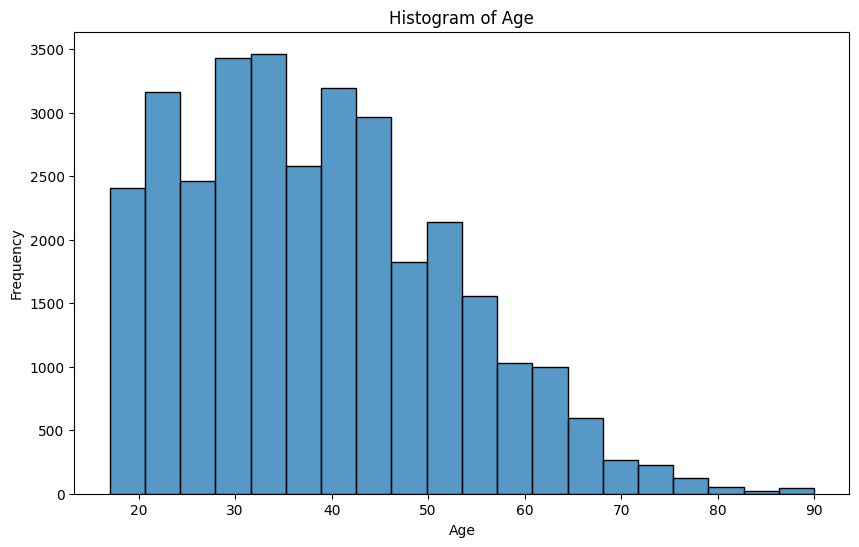

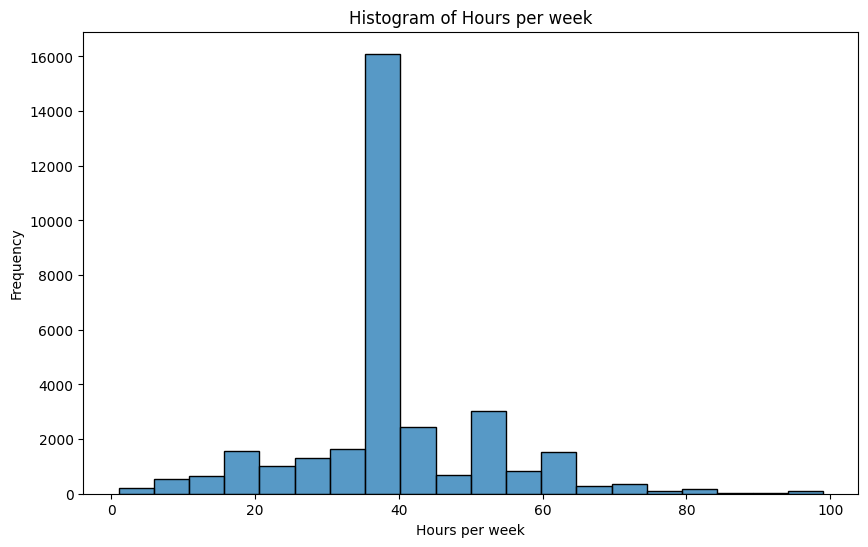

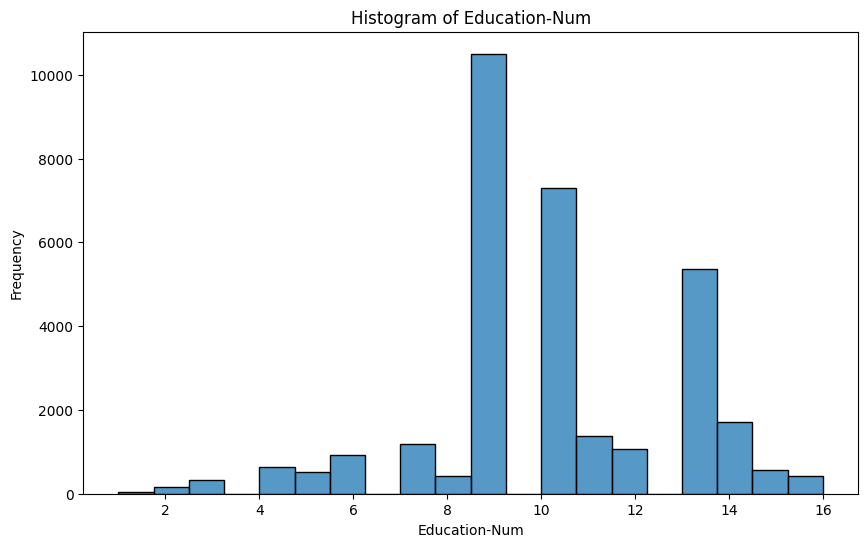

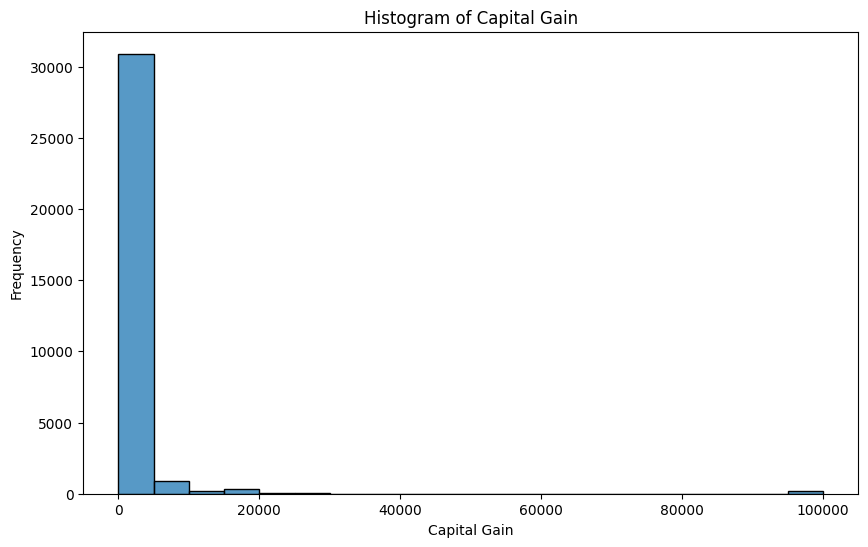

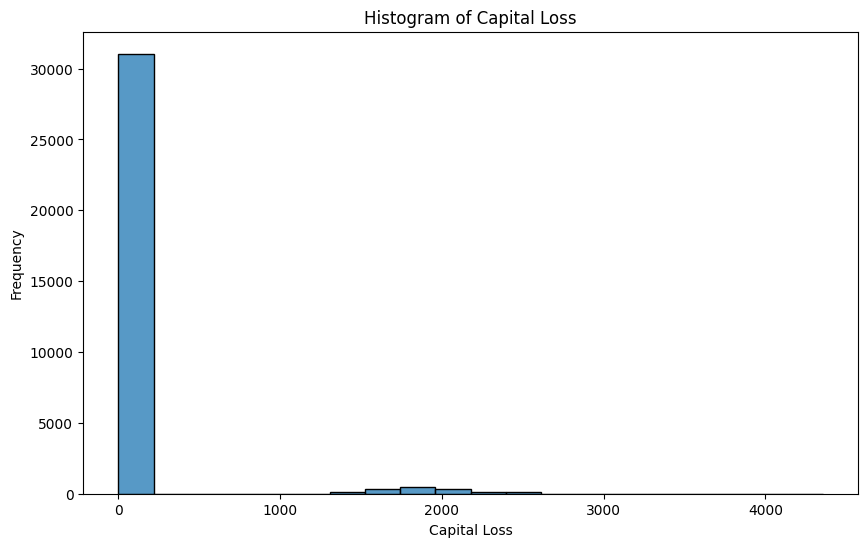

In [12]:
# Histograms for numerical features
numerical_features = ["Age", "Hours per week", "Education-Num", "Capital Gain", "Capital Loss"]
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=False, bins=20)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


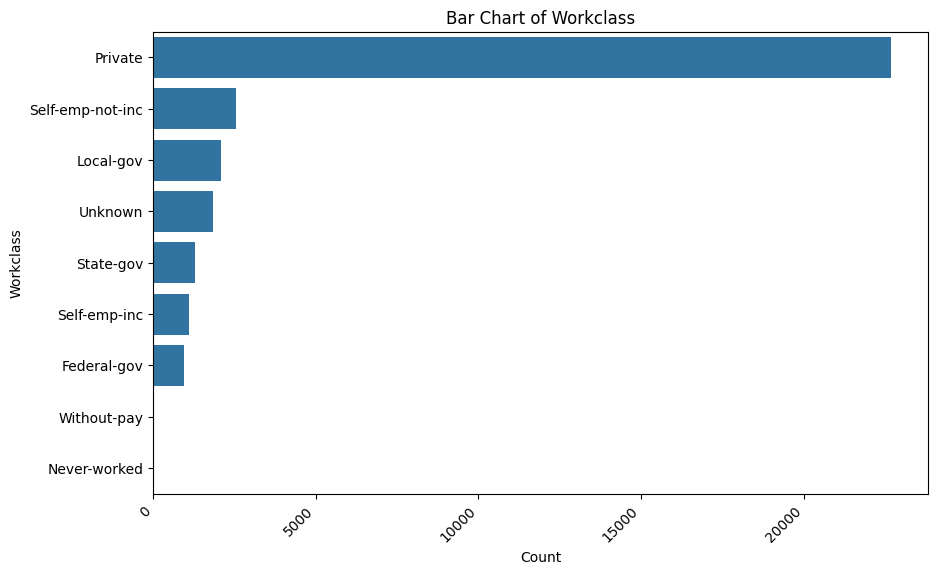

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


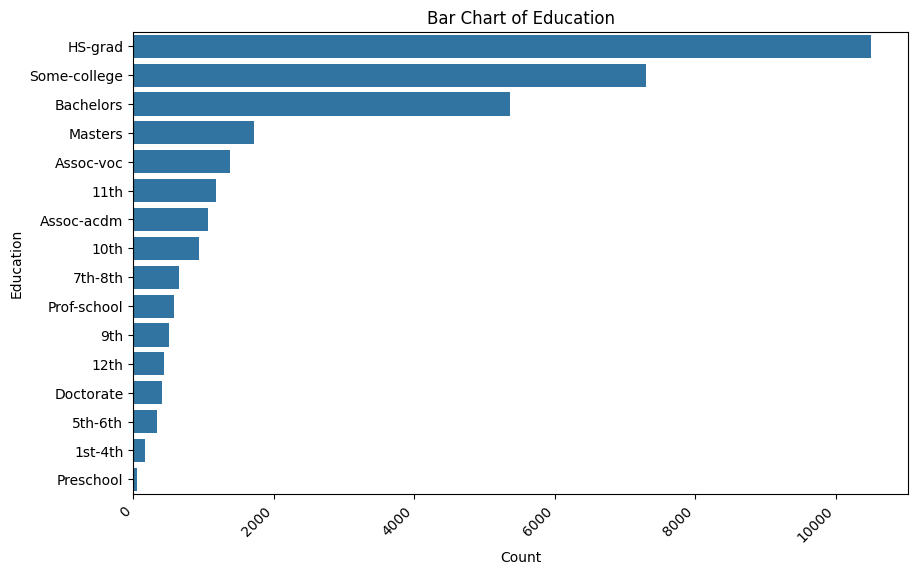

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


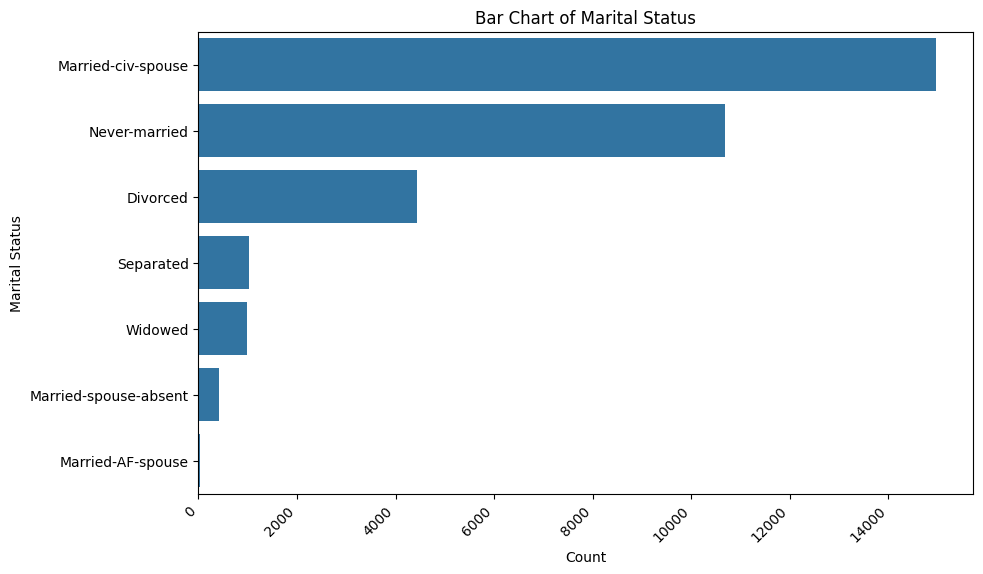

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


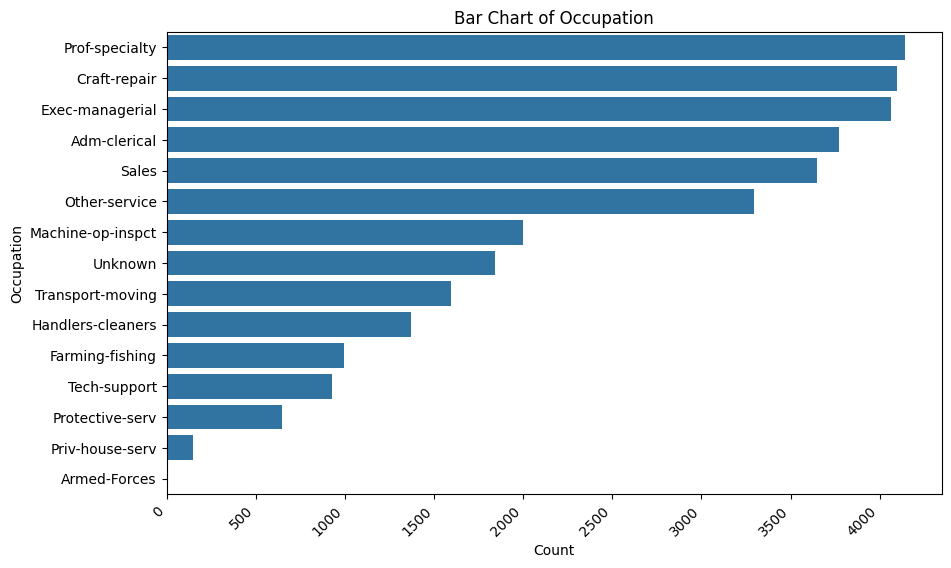

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


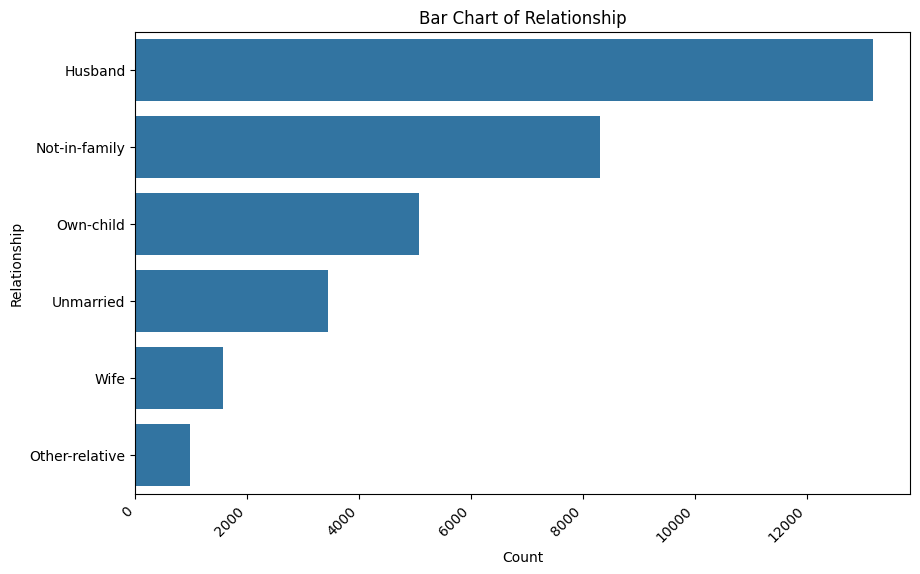

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


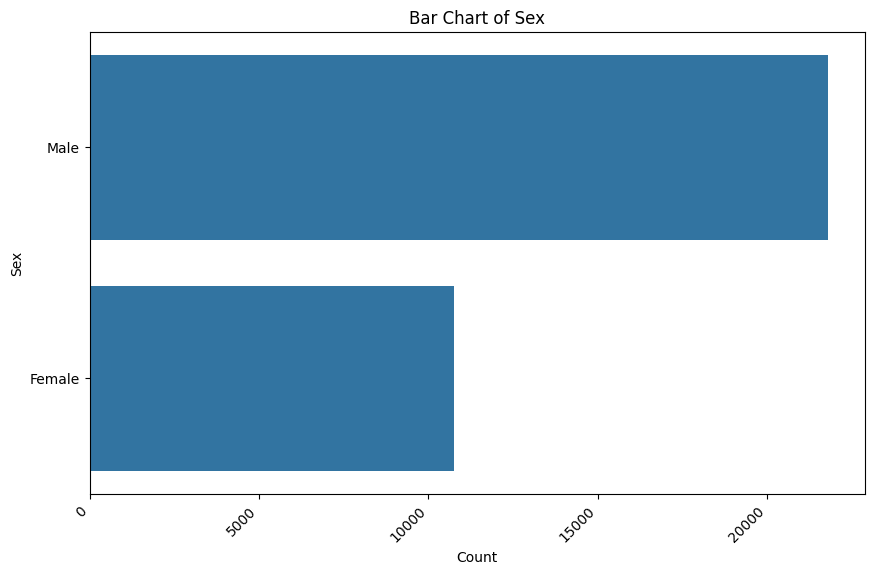

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


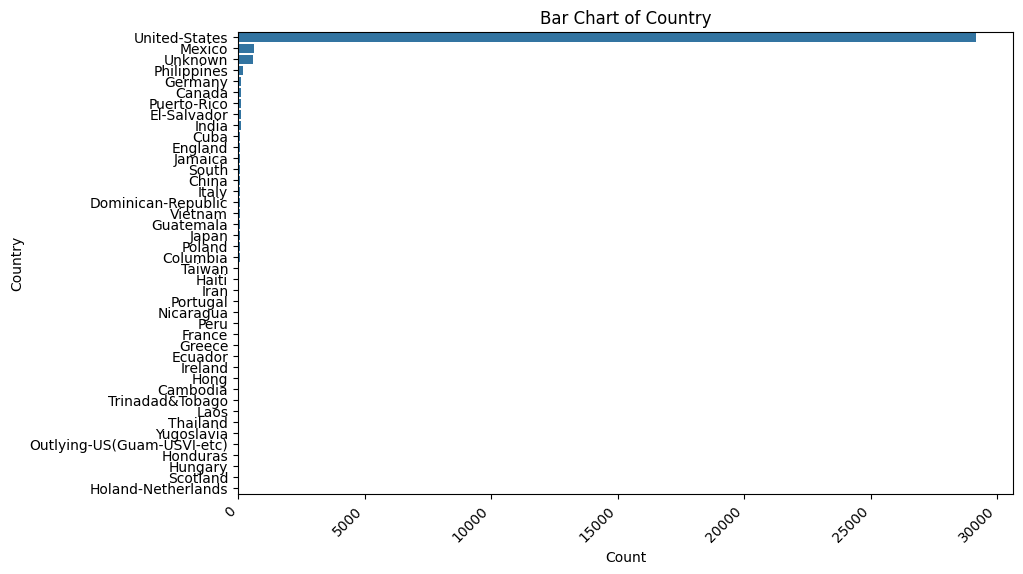

In [13]:
# Bar charts for categorical features
categorical_features = ["Workclass", "Education", "Marital Status", "Occupation", "Relationship", "Sex", "Country"]
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    chart = sns.countplot(y=feature, data=df, order = df[feature].value_counts().index)
    plt.title(f'Bar Chart of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    # If the labels are too cluttered, you can rotate them
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.show()

### Task 4: Encode Categorical Features and Target

Split the DataFrame into two separate DataFrames—one for the features X and one for the target variable y.

Further split X into two more DataFrames—one for numeric columns and one for categorical/object columns.

Create an encoding object to convert categories into numbers. Be sure to handle rare categories appropriately.

Set the encoder’s output to a pandas DataFrame.

Fit the encoder to just the categorical/object DataFrame, and transform the categorical DataFrame using the fitted encoder.

Encode the target variable y as well, assigning 1 to >=50K and 0 to <50K.

In [14]:
# Split the DataFrame into X and y
X = df.drop(columns=['Income'])
y = df['Income']

In [15]:
print(X.head())
print(y)

   Age         Workclass  fnlwgt  Education  Education-Num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       Marital Status         Occupation   Relationship     Sex  Capital Gain  \
0       Never-married       Adm-clerical  Not-in-family    Male          2174   
1  Married-civ-spouse    Exec-managerial        Husband    Male             0   
2            Divorced  Handlers-cleaners  Not-in-family    Male             0   
3  Married-civ-spouse  Handlers-cleaners        Husband    Male             0   
4  Married-civ-spouse     Prof-specialty           Wife  Female             0   

   Capital Loss  Hours per week        Country  
0             0              40  United-States  
1             0              13  United-St

In [16]:
# Create two additional DataFrames from categorical and numerical columns
X_categorical = X[categorical_features]
X_numerical = X[numerical_features]
print(X_categorical.head())
print(X_numerical.head())

          Workclass  Education      Marital Status         Occupation  \
0         State-gov  Bachelors       Never-married       Adm-clerical   
1  Self-emp-not-inc  Bachelors  Married-civ-spouse    Exec-managerial   
2           Private    HS-grad            Divorced  Handlers-cleaners   
3           Private       11th  Married-civ-spouse  Handlers-cleaners   
4           Private  Bachelors  Married-civ-spouse     Prof-specialty   

    Relationship     Sex        Country  
0  Not-in-family    Male  United-States  
1        Husband    Male  United-States  
2  Not-in-family    Male  United-States  
3        Husband    Male  United-States  
4           Wife  Female           Cuba  
   Age  Hours per week  Education-Num  Capital Gain  Capital Loss
0   39              40             13          2174             0
1   50              13             13             0             0
2   38              40              9             0             0
3   53              40              7        

In [17]:
# Create the encoder
encoder = OneHotEncoder(min_frequency=0.03, sparse_output=False, drop='first')
encoder.set_output(transform='pandas')

OneHotEncoder(drop='first', min_frequency=0.03, sparse_output=False)

In [18]:
# Fit the encoder to the data
encoder.fit(X_categorical)

# Apply the encoder to the data
encoded = encoder.transform(X_categorical)

In [19]:
# Concatenate back the DataFrames
X = pd.concat([X_numerical, encoded], axis=1)
X.head()

,Age,Hours per week,Education-Num,Capital Gain,Capital Loss,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Unknown,...,Occupation_Transport-moving,Occupation_Unknown,Occupation_infrequent_sklearn,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Sex_Male,Country_infrequent_sklearn
0,39,40,13,2174,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,50,13,13,0,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,38,40,9,0,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,53,40,7,0,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,28,40,13,0,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [20]:
# Encode the target variable
y = y.replace({'<=50K': 0, '>50K': 1})

### Task 5: Split Data into Train and Test Sets

Split X and y into two additional DataFrames for training and testing. Set the test size to 20% and stratify the split based on the target variable to preserve class balance.

Print out the shapes of the four resulting DataFrames to see the number of samples and features in each set.

In [21]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26048, 41) (6513, 41) (26048,) (6513,)


### Task 6: Define a LightGBM Model 

Instantiate a new LightGBM classifier with the default parameters. This model will be used as a baseline to evaluate the optimized model.

Fit the model on the training dataset.

Get the predictions on the test set and save them to a variable.

In [22]:
# Define the model
model = lgb.LGBMClassifier(random_state=42, verbose = -1)

# Fit the model
model.fit(X_train, y_train)

# Get predictions
y_pred = model.predict(X_test)

### Task 7: Evaluate Baseline Model

Define a new function with the true and predicted labels as arguments. Inside the function:

Print a classification report to assess the accuracy of each class.

Display the confusion matrix to evaluate false positives and false negatives.

Calculate and print the AUC score.

Call the function to evaluate the model.

In [24]:
def evaluate_model(y_test, y_pred):
   print('Classification Report')
   print(classification_report(y_test, y_pred))

   print('Confusion Matrix')
   print(confusion_matrix(y_test, y_pred))

   print(f'AUC: {round(roc_auc_score(y_test, y_pred), 4)}')


In [25]:
evaluate_model(y_test, y_pred)

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4945
           1       0.78      0.67      0.72      1568

    accuracy                           0.88      6513
   macro avg       0.84      0.80      0.82      6513
weighted avg       0.87      0.88      0.87      6513

Confusion Matrix
[[4659  286]
 [ 524 1044]]
AUC: 0.804


### Task 8: Perform k-Fold Cross-Validation

Initialize the number of folds for cross-validation using the cv parameter. A commonly used value is 5 folds.

Run cross-validation, using AUC for the scoring metric.

The cross-validation function should return the scores for each fold. Save these scores in a variable.

Print the mean of the scores to get the overall performance estimate.

In [26]:
# Set number of folds
k = 5

# Run cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=k, scoring='roc_auc')

print('Baseline model mean CV score: {:.4f}'.format(cv_scores.mean()))

Baseline model mean CV score: 0.9267


### Task 9: Define Parameters for Hyperparameter Tuning

create a dictionary object to hold the hyperparameters with the following keys:

num_leaves: Set the value to a random integer sampled uniformly between 30 and 60.

min_child_samples: Set the value to a random integer sampled uniformly between 100 and 300.

subsample: Set the value to a random float sampled uniformly between 0.6 and 0.8.

colsample_bytree: Set the value to a random float sampled uniformly between 0.6 and 0.8.

max_depth: Set the value to a random integer sampled uniformly between 2 and 20.

In [27]:
# Define the parameters distribution
param_dist = {
   'num_leaves': sp_randint(30, 60),
   'min_child_samples': sp_randint(100, 300),
   'subsample': sp_uniform(loc=0.6, scale=0.2),
   'colsample_bytree': sp_uniform(loc=0.6, scale=0.2),
   'max_depth': sp_randint(2, 20),
}

### Task 10: Use RandomSearchCV to Tune Hyperparameters

Set the number of iterations to 20 for the randomized search using a variable. This number will control how many different combinations of hyperparameters are tried.

Create an instance of a randomized search class. Pass the model, parameter distributions, and number of iterations. Use AUC as the scoring metric and set the number of folds to 5.

Fit the randomized search class. The search will sample from the parameter distributions to evaluate different combinations of hyperparameters for the given number of iterations.

The best hyperparameters found in the search can be retrieved from the randomized search instance. Store them in a variable.

In [28]:
# Setup RandomizedSearchCV
n_iter_search = 20

# Create a randomized search class instance
random_search = RandomizedSearchCV(
    estimator=model, param_distributions=param_dist,
    n_iter=n_iter_search, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3, random_state=42
)

# Execute the randomized search
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END colsample_bytree=0.6749080237694725, max_depth=16, min_child_samples=206, num_leaves=37, subsample=0.7197316968394073;, score=0.924 total time=   0.5s
[CV 2/5] END colsample_bytree=0.6749080237694725, max_depth=16, min_child_samples=206, num_leaves=37, subsample=0.7197316968394073;, score=0.926 total time=   0.9s
[CV 3/5] END colsample_bytree=0.6749080237694725, max_depth=16, min_child_samples=206, num_leaves=37, subsample=0.7197316968394073;, score=0.929 total time=   0.7s
[CV 4/5] END colsample_bytree=0.6749080237694725, max_depth=16, min_child_samples=206, num_leaves=37, subsample=0.7197316968394073;, score=0.921 total time=   0.4s
[CV 5/5] END colsample_bytree=0.6749080237694725, max_depth=16, min_child_samples=206, num_leaves=37, subsample=0.7197316968394073;, score=0.921 total time=   0.4s
[CV 1/5] END colsample_bytree=0.6312037280884872, max_depth=12, min_child_samples=187, num_leaves=50, subsample=0.7202

In [29]:
best_params

{'colsample_bytree': 0.7853317731587588,
 'max_depth': 17,
 'min_child_samples': 114,
 'num_leaves': 37,
 'subsample': 0.7140887948810799}

### Task 11: Fit the Best Model on the Full Train Set

Create a new LightGBM model, passing the best parameters.

Fit the model to the train set

In [30]:
# Define a model with the best parameters
optimized_model = lgb.LGBMClassifier(**best_params, random_state=42, verbose = -1)

# Fit the model
optimized_model.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.7853317731587588, max_depth=17,
               min_child_samples=114, num_leaves=37, random_state=42,
               subsample=0.7140887948810799, verbose=-1)

### Task 12: Make Predictions on Test Set

use the optimized model you trained in Task 11 to get new predictions on the test set and store them in a variable.

These predictions will be used to evaluate the new model’s performance.

In [31]:
# Get predictions
y_pred_optimized = optimized_model.predict(X_test)

### Task 13: Evaluate Optimized Model

To complete this task, run the evaluation function you previously defined in Task 7. Pass in the true labels and the optimized model predictions.

You should now see the optimized model’s performance.

In [32]:
# Evaluate the optimized model
evaluate_model(y_test, y_pred_optimized)

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4945
           1       0.78      0.67      0.72      1568

    accuracy                           0.88      6513
   macro avg       0.84      0.81      0.82      6513
weighted avg       0.87      0.88      0.87      6513

Confusion Matrix
[[4654  291]
 [ 519 1049]]
AUC: 0.8051


### Task 14: Plot Feature Importance From LightGBM Model

In this task, you’ll visualize the importance of each feature in the optimized LightGBM model from Task 13. Visualizing the importance of features helps provide insights into which features are most relevant to the model’s predictions.

Perform the following steps to complete this task:

Extract the feature importances from the optimized machine learning model into a variable.

Extract the feature names from the training data into a separate variable.

Sort the indices of the feature importances to order them from most to least important.

Create a bar plot with the feature names on the y-axis and the feature importances on the x-axis.

Label the x-axis and add an appropriate title.

Display the plot.

You’ll have a visualization showing the most and least important features for predictions from the optimized model.

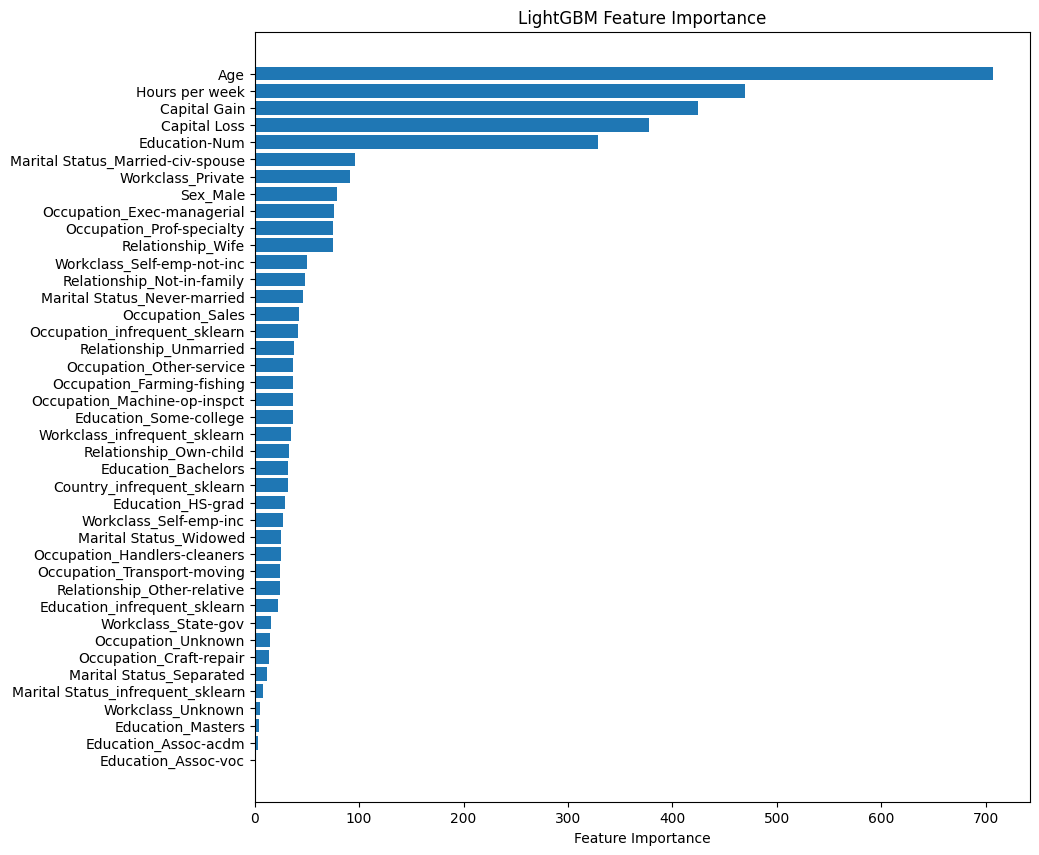

In [33]:
# Extract features importance values
feature_importance = optimized_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort the values
sorted_idx = feature_importance.argsort()

# Create a figure
plt.figure(figsize=(10, 10))

# Plot bars
plt.barh(feature_names[sorted_idx], feature_importance[sorted_idx])

# Add x-axis label and title
plt.xlabel('Feature Importance')
plt.title('LightGBM Feature Importance')

plt.show()

### Task 15: Compute and Visualize SHAP Values

In this task, you’ll compute and visualize the SHAP values to understand feature importance for an optimized machine learning model.

To complete the task, perform the following steps:1. 

Initialize an explainer object using the optimized model and the training dat2. a.

Generate the SHAP values for a training data sample by passing it through the explainer. The result is a matrix of SHAP values for each feature and sam3. ple.

Visualize the global explanations to have a view of the most important features.

Create a beeswarm plot visualizing the SHAP values for each feature.

Create a heatmap visualizing the SHAP values for eac4. h feature.

Plot the local explanations to visualize how each feature contributes to the model output for each individual. Select an individual instance and:

Generate a waterfall plot.

Generate a bar plot.

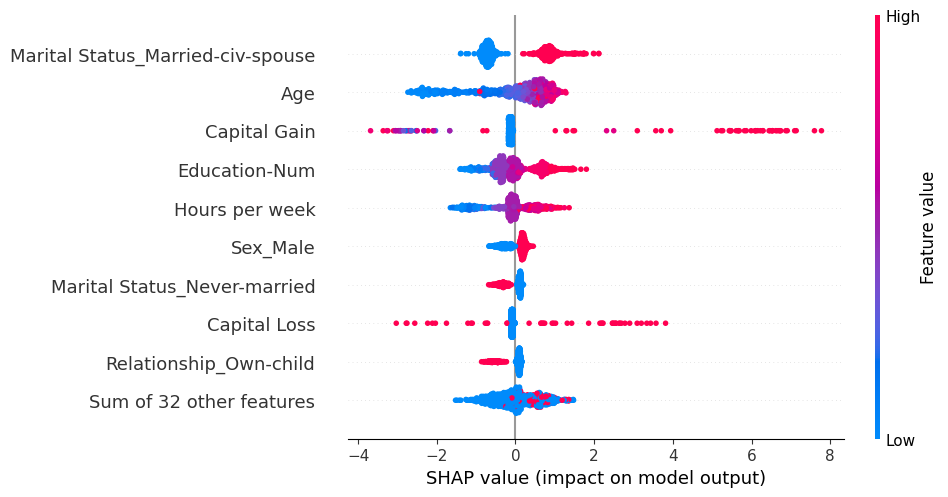

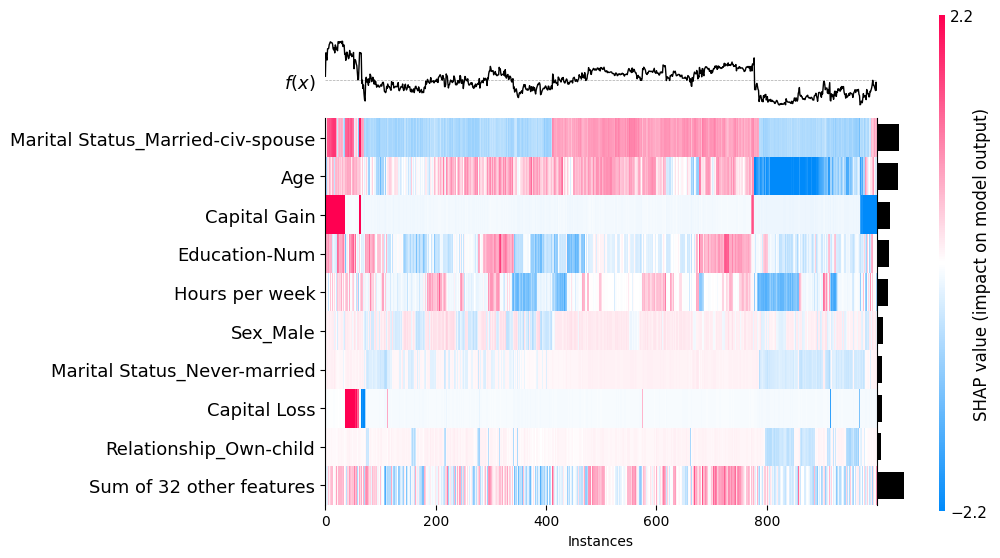

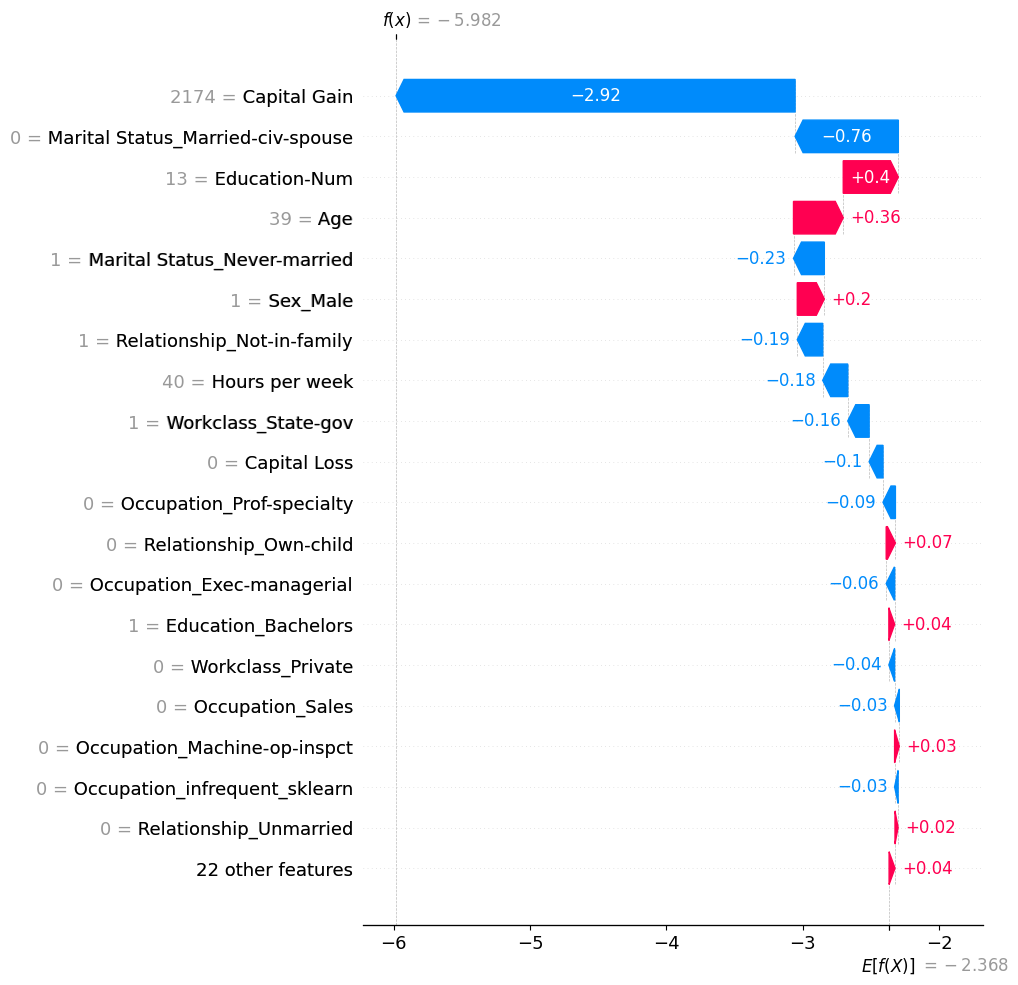

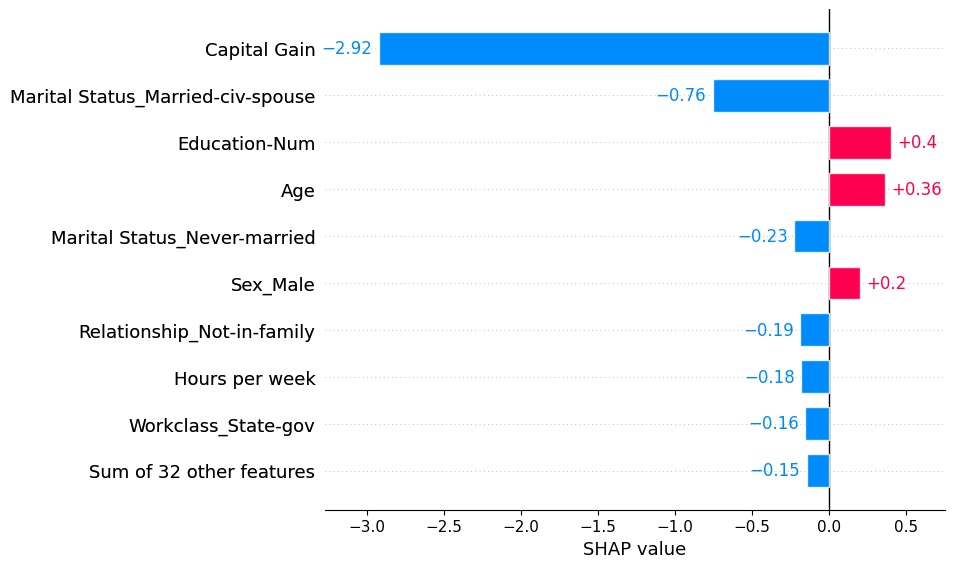

In [34]:
# Compute SHAP values
explainer = shap.Explainer(optimized_model, X)
shap_values = explainer(X[:1000])

shap.plots.beeswarm(shap_values)
shap.plots.heatmap(shap_values)

shap.plots.waterfall(shap_values[0], max_display=20)
shap.plots.bar(shap_values[0])